In [28]:
pip install opencv-python

#USING BUILT IN FUNCTIONS

In [42]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

ronaldo = cv2.imread('/content/1a3d7719af19adca6803d87384f32649.jpg')

In [43]:
def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = image.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    gauss = gauss.reshape(row, col, ch)
    noisy = image + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)


HERE we are adding some noise to the image so that we can remove it later

In [44]:
def average_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

then we are using the average filter kernel with magnitude 3, 3 is the standard value of average filetering in order to remove the noise. 3 says that we are taking a 3*3 square of pixels around each pixel in the image.

 we're taking the pixel values of this small 3x3 square, adding them up, and then dividing by the number of pixels in that square (which is 3x3 = 9 in this case).

In [45]:
def gaussian_blur(image, kernel_size=15, sigma=0):
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), sigma)


here we are applying the gaussian blur kernel to blur the image using gausian params

In [46]:
def sharpening_filter(image):
    kernel = np.array([[0, -1, 0],
                       [-1, 5, -1],
                       [0, -1, 0]], dtype=np.float32)
    return cv2.filter2D(image, -1, kernel)

here we are sharpening the image.

In [47]:
ronaldonoisy_image = add_gaussian_noise(ronaldo)

ronaldonoise_filtered_image = average_filter(ronaldonoisy_image)

ronaldogaussian_blurred_image = gaussian_blur(ronaldo, kernel_size=5, sigma=0)

ronaldosharpened_image = sharpening_filter(ronaldo)


displaying

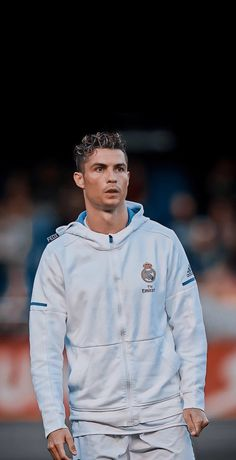

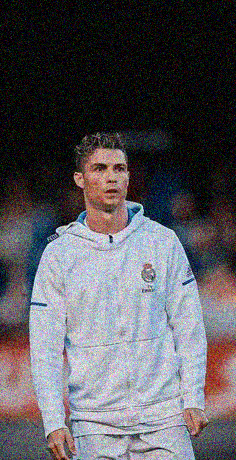

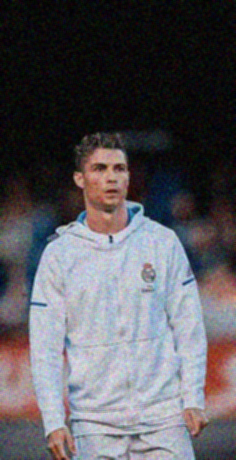

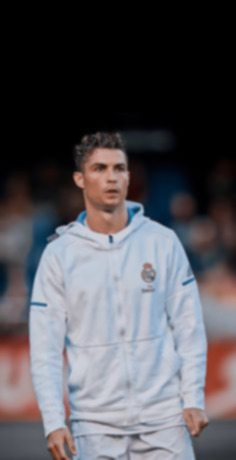

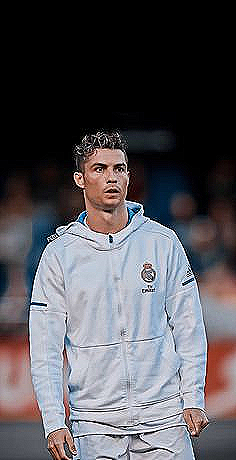

In [48]:
cv2_imshow(ronaldo)
cv2_imshow(ronaldonoisy_image)
cv2_imshow(ronaldonoise_filtered_image)
cv2_imshow(ronaldogaussian_blurred_image)
cv2_imshow(ronaldosharpened_image)

1. here the 1st image is the original image
2. 2nd image is the one where we explicitly added some noise to the pic
3. 3rd image is the noise removed image
4. 4th image the gaussian blurred image
5. 5th image is the sharpened image using

#USER DEFINED

In [36]:
RR = cv2.imread('/content/WhatsApp Image 2023-01-20 at 17.05.36.jpg')

def add_gaussian_noise(image, mean=0, sigma=25):
    row, col, ch = RR.shape
    gauss = np.random.normal(mean, sigma, (row, col, ch))
    noisy = RR + gauss
    return np.clip(noisy, 0, 255).astype(np.uint8)

In [37]:

def average_filter(RR, kernel_size=3):
    row, col, ch = RR.shape
    filtered_RR = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_RR = cv2.copyMakeBorder(RR, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_RR[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            filtered_RR[i-pad_size, j-pad_size] = np.mean(roi, axis=(0, 1))
    return filtered_RR


In [38]:


def gaussian_blur(RR, kernel_size=20, sigma=0):
    row, col, ch = RR.shape
    filtered_RR = np.zeros((row, col, ch), dtype=np.uint8)
    pad_size = kernel_size // 2
    padded_RR = cv2.copyMakeBorder(RR, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.zeros((kernel_size, kernel_size))
    for i in range(kernel_size):
        for j in range(kernel_size):
            x = i - pad_size
            y = j - pad_size
            kernel[i, j] = np.exp(-(x ** 2 + y ** 2) / (2 * sigma ** 2))
    kernel /= np.sum(kernel)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_RR[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1, :]
            for c in range(ch):
                filtered_RR[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return filtered_RR


In [39]:
def sharpening_filter(RR):
    row, col = RR.shape[:2]
    filtered_RR = np.zeros_like(RR, dtype=np.float32)
    pad_size = 1
    padded_RR = cv2.copyMakeBorder(RR, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)
    kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]], dtype=np.float32)
    for i in range(pad_size, row + pad_size):
        for j in range(pad_size, col + pad_size):
            roi = padded_RR[i-pad_size:i+pad_size+1, j-pad_size:j+pad_size+1]
            for c in range(RR.shape[2]):
                filtered_RR[i-pad_size, j-pad_size, c] = np.sum(roi[:,:,c] * kernel)
    return np.clip(filtered_RR, 0, 255).astype(np.uint8)




In [40]:
RR_noisy_image = add_gaussian_noise(RR)

RRnoise_filtered_image = average_filter(RR_noisy_image)

RRgaussian_blurred_image = gaussian_blur(RR, kernel_size=5, sigma=1)

RRsharpened_image = sharpening_filter(RR)



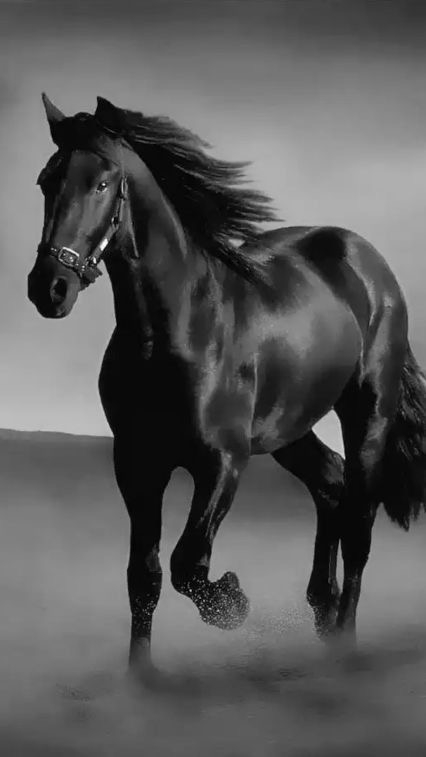

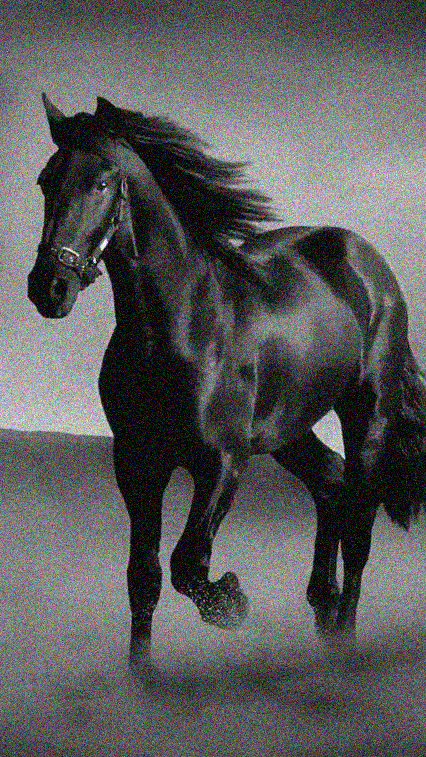

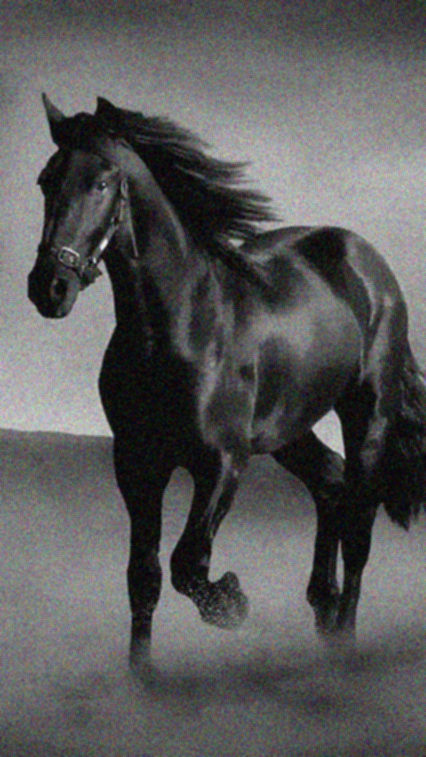

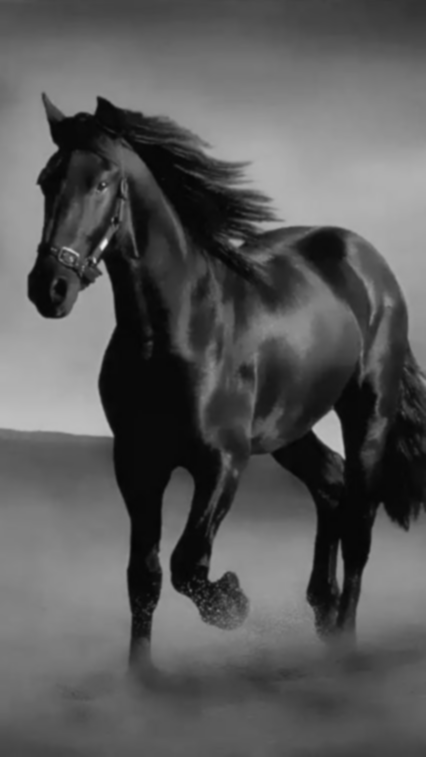

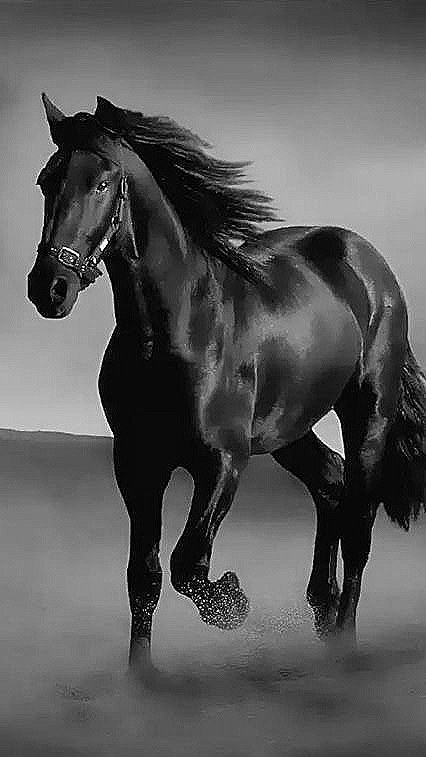

In [41]:
cv2_imshow(RR)
cv2_imshow(RR_noisy_image)
cv2_imshow(RRnoise_filtered_image)
cv2_imshow(RRgaussian_blurred_image)
cv2_imshow(RRsharpened_image)